In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [63]:
IMAGE_WIDTH=48
IMAGE_HEIGHT=48
IMAGE_CHANNELS=3
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
BATCH_SIZE = 32
EPOCHS = 20

## Por motivos logísticos (el dataset de imágenes pesa 4 gigas), el tratamiento de imágenes hasta obtener las imágenes redimensionadas, se hará en local.

In [3]:
TRAIN_PATH = "..\\..\\..\\base\\train\\"
TEST_PATH = "..\\..\\..\\base\\test\\"

In [4]:
os.getcwd()

'c:\\Users\\hugom\\OneDrive\\Documentos\\Personal\\Formación\\The Bridge\\TrabajoBcamp\\Local\\3-Machine_Learning\\Entrega\\git\\Mushroom_classifier\\notebooks'

In [5]:
train_df = pd.read_csv('..\\data\\images\\0_images_train.csv')

In [6]:
train_df.head()

,filename,Amanita Vaginata Var - Vaginata,Amanita brunneitoxicaria,Amanita phalloides-,Amanita princeps Corner - Bas,Chlorophyllum molybdites,Lactarius glaucescens,Lentinus polychrous Berk,Lentinus squarrosulas Mont,Macrolepiota gracilenta,Mycoamaranthus cambodgensis,Pleurotus pulmonarius,Schizophylllum commune,Scleroderma sinnamariense
0,IMG_20230131_10221_Burst10_jpg.rf.3d0d859972a6...,0,0,0,0,0,0,1,0,0,0,0,0,0
1,IMG_20230131_105942_Burst18_jpg.rf.3cd9527b1bb...,0,0,0,0,0,0,0,0,0,1,0,0,0
2,IMG_20230205_210944_Burst11_jpg.rf.3d4a5083517...,0,1,0,0,0,0,0,0,0,0,0,0,0
3,IMG_20230206_114826_Burst18_jpg.rf.3cf73ef01b0...,0,0,0,0,0,1,0,0,0,0,0,0,0
4,IMG_20230207_120343_Burst20_jpg.rf.3cdd35e4008...,0,0,0,0,0,0,0,0,0,1,0,0,0


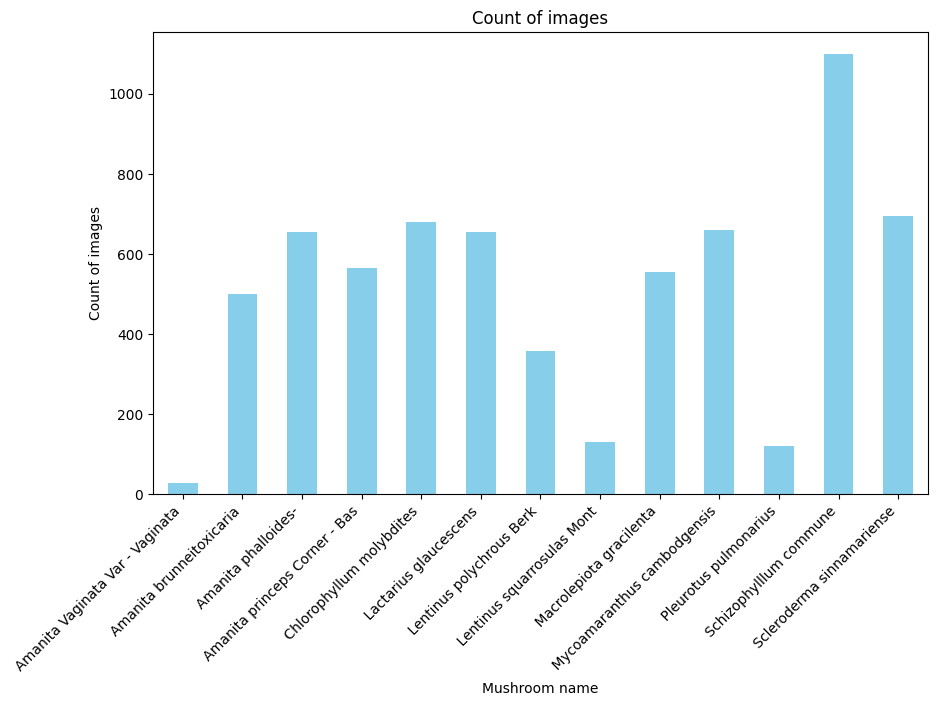

In [10]:
count_of_ones = train_df.drop(columns='filename').sum()

# Plotting
plt.figure(figsize=(10, 6))
count_of_ones.plot(kind='bar', color='skyblue')
plt.title('Count of images')
plt.xlabel('Mushroom name')
plt.ylabel('Count of images')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
mushroom_names = [
    "Amanita Vaginata Var - Vaginata",
    "Amanita brunneitoxicaria",
    "Amanita phalloides",
    "Amanita princeps Corner - Bas",
    "Chlorophyllum molybdites",
    "Lactarius glaucescens",
    "Lentinus polychrous Berk",
    "Lentinus squarrosulas Mont",
    "Macrolepiota gracilenta",
    "Mycoamaranthus cambodgensis",
    "Pleurotus pulmonarius",
    "Schizophylllum commune",
    "Scleroderma sinnamariense"
]

poisonous_indicator = [0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]


names_df = pd.DataFrame({'Mushroom': mushroom_names, 'Poisonous': poisonous_indicator})

In [12]:
filename_list = train_df['filename'].tolist()

(3035, 3712, 3)
234


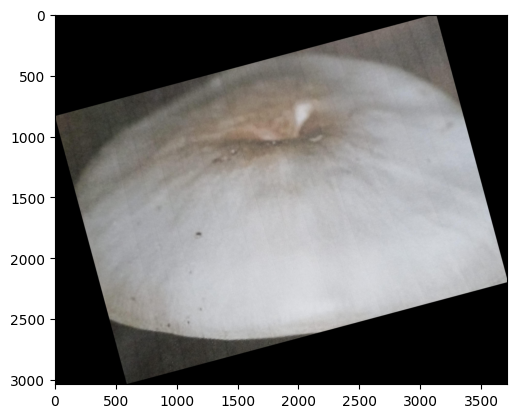

In [13]:
from skimage.io import imread
import cv2

sample = random.choice(filename_list)
image = imread(TRAIN_PATH + sample)

print(image.shape)
print(np.max(image))
plt.imshow(image);

Original image: (3129, 4038, 3)
Image reshaped: (64, 64, 3)


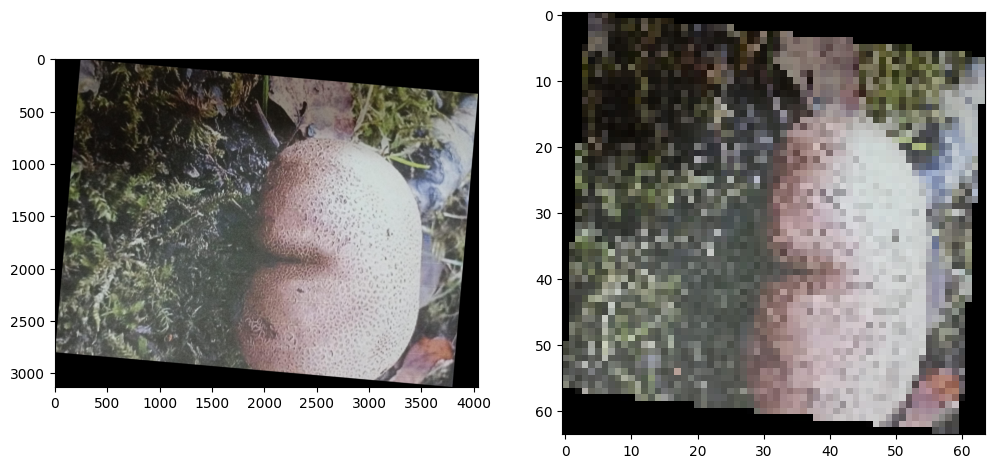

In [15]:
plt.figure(figsize=(12, 12))

sample = random.choice(filename_list)
image = imread(TRAIN_PATH + sample)
imagesmall = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))

print("Original image:", image.shape)
print("Image reshaped:", imagesmall.shape)

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)

# Resized image
plt.subplot(1, 2, 2)
plt.imshow(imagesmall);

In [16]:
import os

def resize_images_in_collection(collection_path, resized_path, image_size):
    """
    Resize all images in a collection and save them to a specified folder.
    
    Parameters:
    - collection_path (str): Path to the image collection.
    - resized_path (str): Path to the desired folder for the resized collection.
    - image_size (int): Length of each side of a square for resizing.
    """

    target_size = (image_size, image_size)

    """
    -Loop through each file in the input directory
    -Read the image using OpenCV
    -Resize the image to input size
    -Get the output filename path
    -Save the resized image with the original filename in the new collection folder
    """
    os.makedirs(resized_path, exist_ok=True)
    for filename in os.listdir(collection_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            
            image_path = os.path.join(collection_path, filename)
            img = cv2.imread(image_path)

            resized_img = cv2.resize(img, (image_size, image_size))

            output_filename = os.path.join(resized_path, filename)

            cv2.imwrite(output_filename, resized_img)


    print("Resize process complete.")

In [17]:

collection_path = TRAIN_PATH
resized_path = '..\\data\\images\\new_train\\'
image_size = 48

resize_images_in_collection(collection_path, resized_path, image_size)

Resize process complete.


In [18]:
collection_path = TEST_PATH
resized_path = '..\\data\\images\\new_test\\'
image_size = 48

resize_images_in_collection(collection_path, resized_path, image_size)

Resize process complete.


In [26]:
TRAIN_PATH_48 = TRAIN_PATH + 'new_train\\'
TEST_PATH_48 = TEST_PATH + 'new_test\\'

In [25]:
TRAIN_PATH_48

'..\\..\\..\\base\\train\\\\new_train\\'

In [29]:
def read_images(image_path):
    img = cv2.imread(image_path)
    return img

# Apply the read_image function to the 'image_name' column
train_df['pixel_array'] = train_df['filename'].apply(lambda x: read_images(TRAIN_PATH_48+x))

In [33]:
train_df.columns

Index(['filename', ' Amanita Vaginata Var - Vaginata',
       ' Amanita brunneitoxicaria', ' Amanita phalloides-',
       ' Amanita princeps Corner - Bas', ' Chlorophyllum molybdites',
       ' Lactarius glaucescens', ' Lentinus polychrous Berk',
       ' Lentinus squarrosulas Mont', ' Macrolepiota gracilenta',
       ' Mycoamaranthus cambodgensis', ' Pleurotus pulmonarius',
       ' Schizophylllum commune', ' Scleroderma sinnamariense', 'pixel_array'],
      dtype='object')

In [30]:
train_df.head(3)

,filename,Amanita Vaginata Var - Vaginata,Amanita brunneitoxicaria,Amanita phalloides-,Amanita princeps Corner - Bas,Chlorophyllum molybdites,Lactarius glaucescens,Lentinus polychrous Berk,Lentinus squarrosulas Mont,Macrolepiota gracilenta,Mycoamaranthus cambodgensis,Pleurotus pulmonarius,Schizophylllum commune,Scleroderma sinnamariense,pixel_array
0,IMG_20230131_10221_Burst10_jpg.rf.3d0d859972a6...,0,0,0,0,0,0,1,0,0,0,0,0,0,"[[[5, 0, 1], [5, 0, 2], [4, 0, 0], [2, 0, 0], ..."
1,IMG_20230131_105942_Burst18_jpg.rf.3cd9527b1bb...,0,0,0,0,0,0,0,0,0,1,0,0,0,"[[[4, 0, 1], [0, 0, 0], [149, 165, 158], [120,..."
2,IMG_20230205_210944_Burst11_jpg.rf.3d4a5083517...,0,1,0,0,0,0,0,0,0,0,0,0,0,"[[[3, 1, 1], [2, 0, 0], [2, 0, 0], [3, 1, 1], ..."


In [31]:
X = np.array(train_df['pixel_array'].tolist())

In [32]:
X.shape

(6693, 48, 48, 3)

In [39]:
y=np.array(train_df.drop(columns=['filename', 'pixel_array']))

In [40]:
y.shape

(6693, 13)

In [41]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5354, 48, 48, 3)
(1339, 48, 48, 3)
(5354, 13)
(1339, 13)


In [61]:
from tensorflow import keras

layers = [
    keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(48,48,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.1),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.1),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(13, activation='sigmoid')
]

cnn_model = keras.Sequential(layers)

cnn_model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [55]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 46, 46, 128)       3584      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 23, 23, 128)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 64)        73792     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 64)       

In [46]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=5)

In [47]:
from keras.callbacks import ModelCheckpoint
mcheckpoint = ModelCheckpoint("callback_model.keras")

In [65]:
history = cnn_model.fit(X_train,
         y_train,
         epochs = EPOCHS,
         batch_size = BATCH_SIZE,
         callbacks = [earlystop, mcheckpoint],
         validation_split = 0.2)

Epoch 1/20
134/134 [==============================] - 9s 65ms/step - loss: 0.5390 - accuracy: 0.8144 - val_loss: 1.0398 - val_accuracy: 0.7059
Epoch 2/20
134/134 [==============================] - 12s 92ms/step - loss: 0.5171 - accuracy: 0.8207 - val_loss: 0.7402 - val_accuracy: 0.7824
Epoch 3/20
134/134 [==============================] - 12s 90ms/step - loss: 0.4422 - accuracy: 0.8443 - val_loss: 0.7426 - val_accuracy: 0.7908
Epoch 4/20
134/134 [==============================] - 12s 91ms/step - loss: 0.4253 - accuracy: 0.8550 - val_loss: 0.6569 - val_accuracy: 0.8058
Epoch 5/20
134/134 [==============================] - 12s 92ms/step - loss: 0.3863 - accuracy: 0.8669 - val_loss: 0.6697 - val_accuracy: 0.8217
Epoch 6/20
134/134 [==============================] - 13s 100ms/step - loss: 0.4325 - accuracy: 0.8531 - val_loss: 0.7369 - val_accuracy: 0.8151
Epoch 7/20
134/134 [==============================] - 13s 97ms/step - loss: 0.4032 - accuracy: 0.8608 - val_loss: 0.7572 - val_accuracy:

In [66]:
results = cnn_model.evaluate(X_test, y_test)
results

42/42 [==============================] - 1s 20ms/step - loss: 0.7835 - accuracy: 0.7834


[0.7835459113121033, 0.7834204435348511]

In [77]:
prediction = cnn_model.predict(X_test).argmax(axis=1)

 1/42 [..............................] - ETA: 1s

42/42 [==============================] - 1s 19ms/step


In [78]:
prediction

array([11, 11, 11, ...,  8,  8,  9], dtype=int64)

In [82]:
y_test

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [84]:
indices_of_ones = np.argmax(y_test, axis=1)

In [85]:
indices_of_ones

array([11, 11, 11, ...,  5,  8,  9], dtype=int64)

In [83]:
prediction

array([11, 11, 11, ...,  8,  8,  9], dtype=int64)

<Axes: >

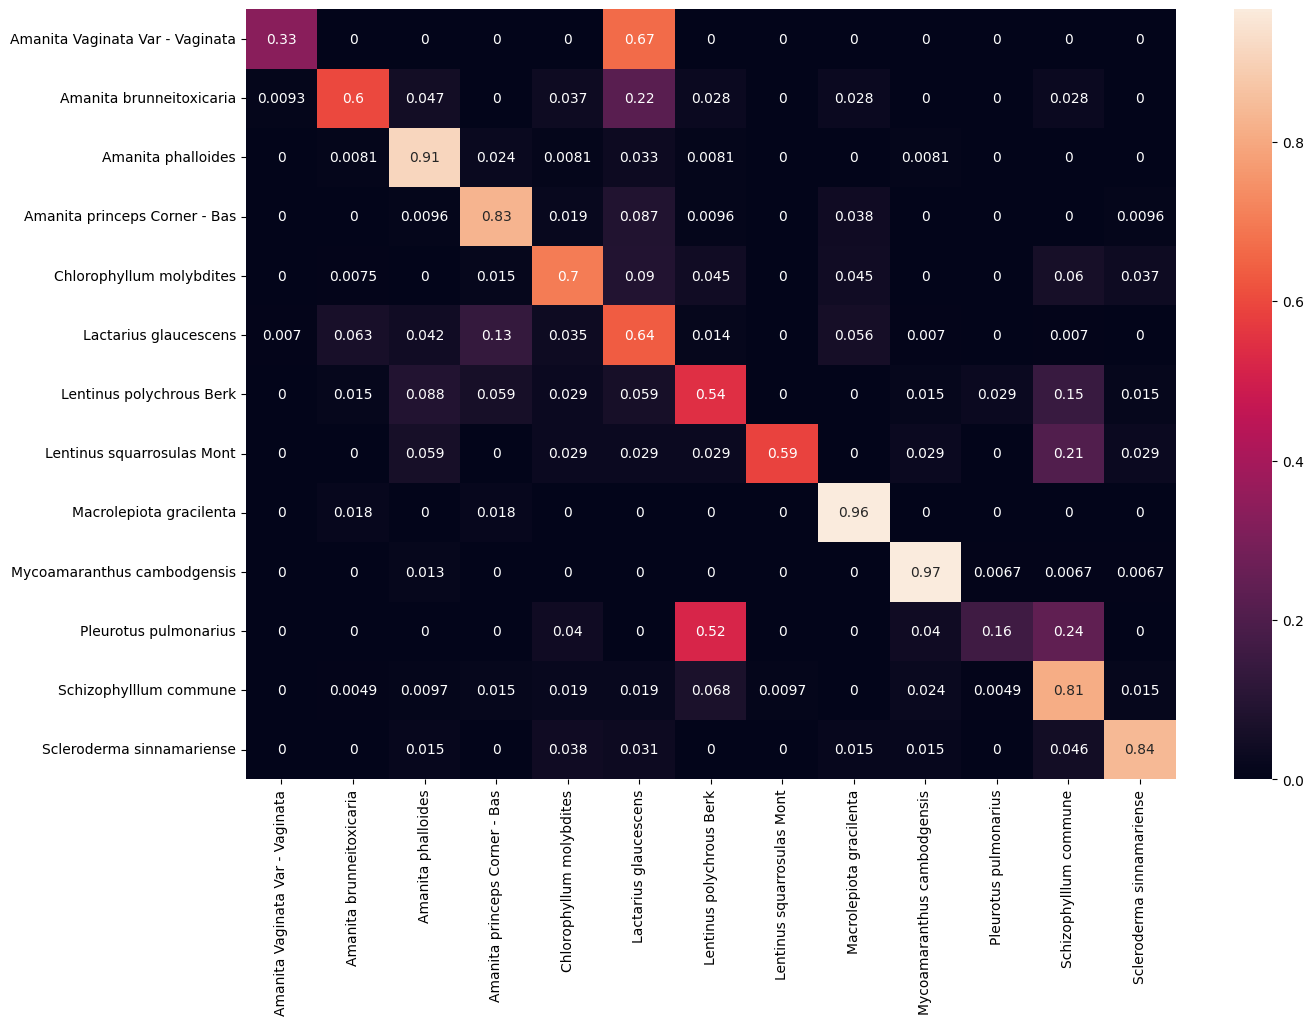

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

c_mat = confusion_matrix(indices_of_ones, prediction, normalize='true')
plt.figure(figsize=(15,10))
sns.heatmap(c_mat, annot=True, xticklabels=mushroom_names, yticklabels=mushroom_names)

## Hay un serio problema de undersampling en varias categorías.

In [136]:
desired_value_rows = train_df[train_df[' Amanita Vaginata Var - Vaginata'] == 1]
oversample_ratio = 4


In [137]:
oversampled_rows = pd.concat([desired_value_rows] * int(oversample_ratio), ignore_index=True)

oversampled_df = pd.concat([train_df, oversampled_rows], ignore_index=True)

oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [135]:
oversampled_df.head(2)

,filename,Amanita Vaginata Var - Vaginata,Amanita brunneitoxicaria,Amanita phalloides-,Amanita princeps Corner - Bas,Chlorophyllum molybdites,Lactarius glaucescens,Lentinus polychrous Berk,Lentinus squarrosulas Mont,Macrolepiota gracilenta,Mycoamaranthus cambodgensis,Pleurotus pulmonarius,Schizophylllum commune,Scleroderma sinnamariense,pixel_array
0,IMG_20230207_114419_Burst19_jpg.rf.2b9fba0aa5b...,0,0,0,0,0,0,0,0,0,0,0,0,1,"[[[2, 0, 0], [4, 2, 1], [1, 2, 0], [0, 1, 0], ..."
1,IMG_20230205_202031_Burst07_jpg.rf.f0ac7d3fe68...,0,0,0,0,1,0,0,0,0,0,0,0,0,"[[[2, 0, 1], [0, 0, 1], [0, 0, 0], [0, 1, 1], ..."


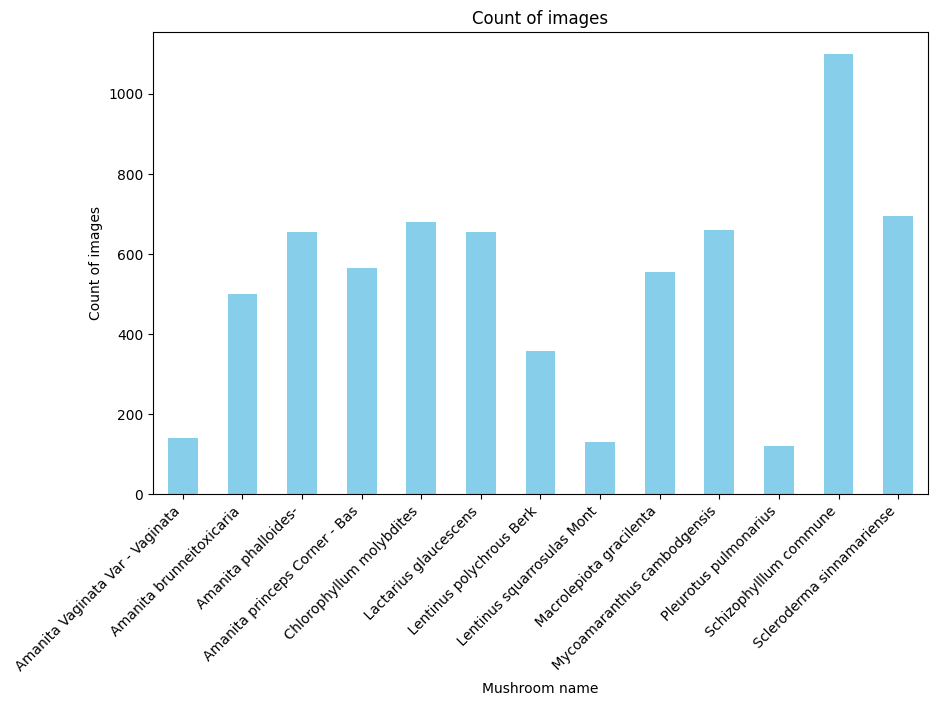

In [131]:
count_of_ones = oversampled_df.drop(columns=['filename','pixel_array']).sum()

# Plotting
plt.figure(figsize=(10, 6))
count_of_ones.plot(kind='bar', color='skyblue')
plt.title('Count of images')
plt.xlabel('Mushroom name')
plt.ylabel('Count of images')
plt.xticks(rotation=45, ha='right')
plt.show()

In [123]:
oversampled_df.columns

Index(['filename', ' Amanita Vaginata Var - Vaginata',
       ' Amanita brunneitoxicaria', ' Amanita phalloides-',
       ' Amanita princeps Corner - Bas', ' Chlorophyllum molybdites',
       ' Lactarius glaucescens', ' Lentinus polychrous Berk',
       ' Lentinus squarrosulas Mont', ' Macrolepiota gracilenta',
       ' Mycoamaranthus cambodgensis', ' Pleurotus pulmonarius',
       ' Schizophylllum commune', ' Scleroderma sinnamariense', 'pixel_array'],
      dtype='object')

In [141]:
desired_value_rows = train_df[train_df[' Lentinus squarrosulas Mont'] == 1]
oversample_ratio = 2

In [142]:
oversampled_rows = pd.concat([desired_value_rows] * int(oversample_ratio), ignore_index=True)

oversampled_df_3 = pd.concat([oversampled_df_2, oversampled_rows], ignore_index=True)

oversampled_df_3 = oversampled_df_3.sample(frac=1, random_state=42).reset_index(drop=True)

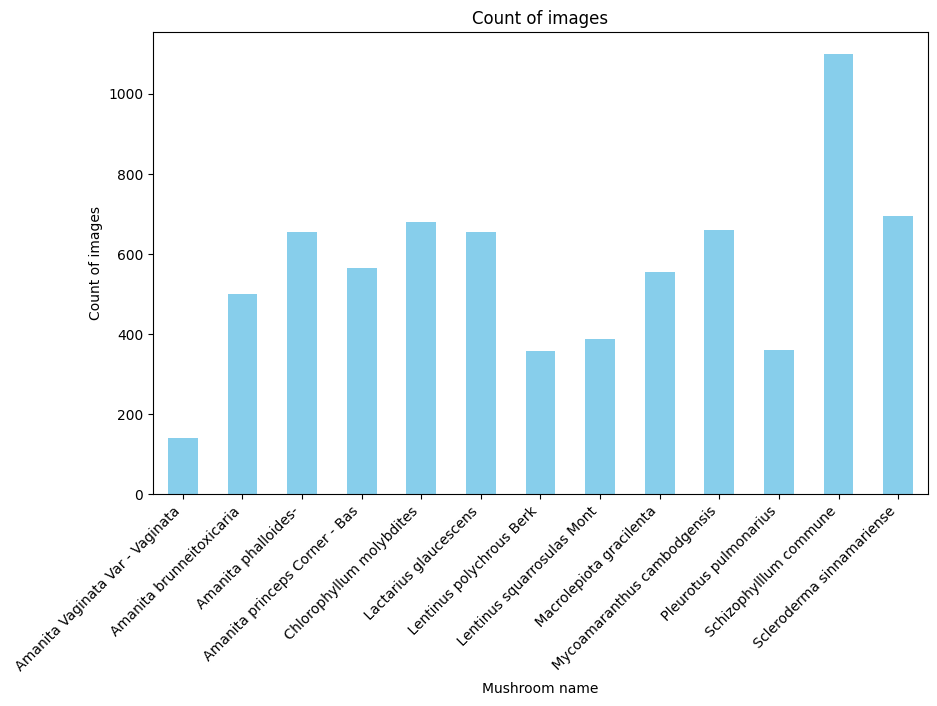

In [144]:
count_of_ones = oversampled_df_3.drop(columns=['filename','pixel_array']).sum()

# Plotting
plt.figure(figsize=(10, 6))
count_of_ones.plot(kind='bar', color='skyblue')
plt.title('Count of images')
plt.xlabel('Mushroom name')
plt.ylabel('Count of images')
plt.xticks(rotation=45, ha='right')
plt.show()

In [145]:
desired_value_rows = train_df[train_df[' Amanita Vaginata Var - Vaginata'] == 1]
oversample_ratio = 2

In [147]:
oversampled_rows = pd.concat([desired_value_rows] * int(oversample_ratio), ignore_index=True)

oversampled_df_4 = pd.concat([oversampled_df_3, oversampled_rows], ignore_index=True)

oversampled_df_4 = oversampled_df_4.sample(frac=1, random_state=42).reset_index(drop=True)

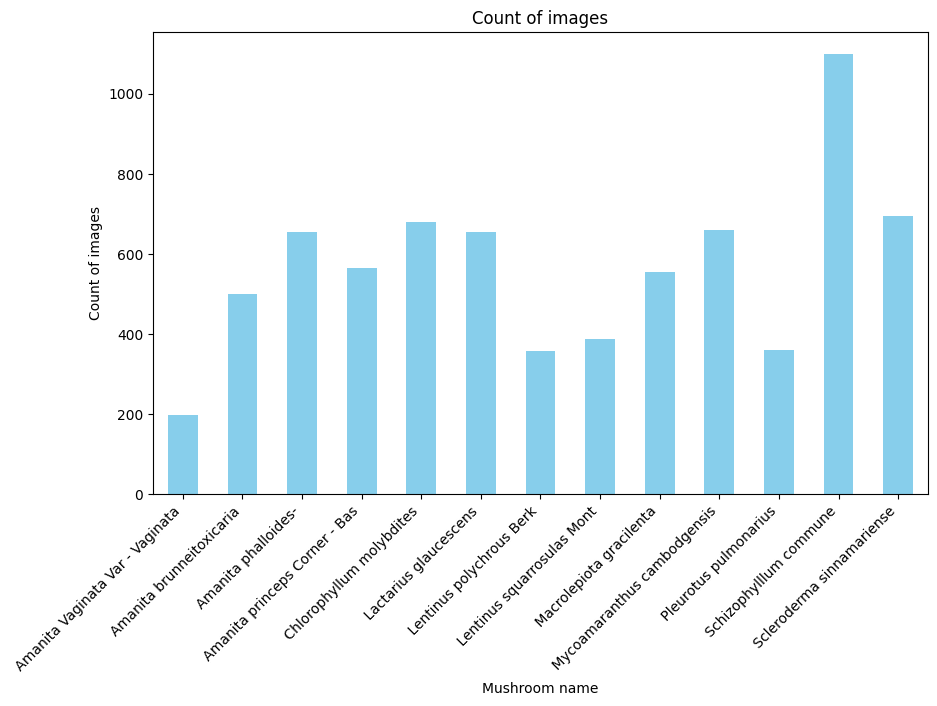

In [148]:
count_of_ones = oversampled_df_4.drop(columns=['filename','pixel_array']).sum()

# Plotting
plt.figure(figsize=(10, 6))
count_of_ones.plot(kind='bar', color='skyblue')
plt.title('Count of images')
plt.xlabel('Mushroom name')
plt.ylabel('Count of images')
plt.xticks(rotation=45, ha='right')
plt.show()

In [149]:
X_2 = np.array(oversampled_df_4['pixel_array'].tolist())

In [151]:
y_2=np.array(oversampled_df_4.drop(columns=['filename', 'pixel_array']))

In [152]:
print(X_2.shape)
print(y_2.shape)

(7359, 48, 48, 3)
(7359, 13)


In [153]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [158]:
from tensorflow import keras

layers = [
    keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(48,48,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.1),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.1),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(13, activation='sigmoid')
]

cnn_model_final = keras.Sequential(layers)

cnn_model_final.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [159]:
history_final = cnn_model_final.fit(X_2_train,
         y_2_train,
         epochs = EPOCHS,
         batch_size = BATCH_SIZE,
         callbacks = [earlystop, mcheckpoint],
         validation_split = 0.2)

Epoch 1/20


148/148 [==============================] - 14s 88ms/step - loss: 3.5172 - accuracy: 0.1459 - val_loss: 2.3229 - val_accuracy: 0.1715
Epoch 2/20
148/148 [==============================] - 13s 88ms/step - loss: 2.2909 - accuracy: 0.2028 - val_loss: 2.2097 - val_accuracy: 0.1885
Epoch 3/20
148/148 [==============================] - 14s 93ms/step - loss: 2.2087 - accuracy: 0.2330 - val_loss: 2.3482 - val_accuracy: 0.1672
Epoch 4/20
148/148 [==============================] - 13s 90ms/step - loss: 2.1813 - accuracy: 0.2310 - val_loss: 2.1349 - val_accuracy: 0.2360
Epoch 5/20
148/148 [==============================] - 13s 91ms/step - loss: 1.9828 - accuracy: 0.3047 - val_loss: 1.8739 - val_accuracy: 0.3676
Epoch 6/20
148/148 [==============================] - 14s 91ms/step - loss: 1.8278 - accuracy: 0.3710 - val_loss: 1.6155 - val_accuracy: 0.4703
Epoch 7/20
148/148 [==============================] - 14s 96ms/step - loss: 1.6053 - accuracy: 0.4521 - val_loss: 1.6197 - val_accuracy: 0.4550
Epo

In [161]:
results2 = cnn_model_final.evaluate(X_2_test, y_2_test)
results2

 1/46 [..............................] - ETA: 2s - loss: 0.6630 - accuracy: 0.8438

46/46 [==============================] - 1s 23ms/step - loss: 0.6172 - accuracy: 0.8247


[0.6171914935112, 0.82472825050354]

In [162]:
prediction_2 = cnn_model_final.predict(X_2_test).argmax(axis=1)

46/46 [==============================] - 1s 22ms/step


In [163]:
indices_of_ones_2 = np.argmax(y_2_test, axis=1)

<Axes: >

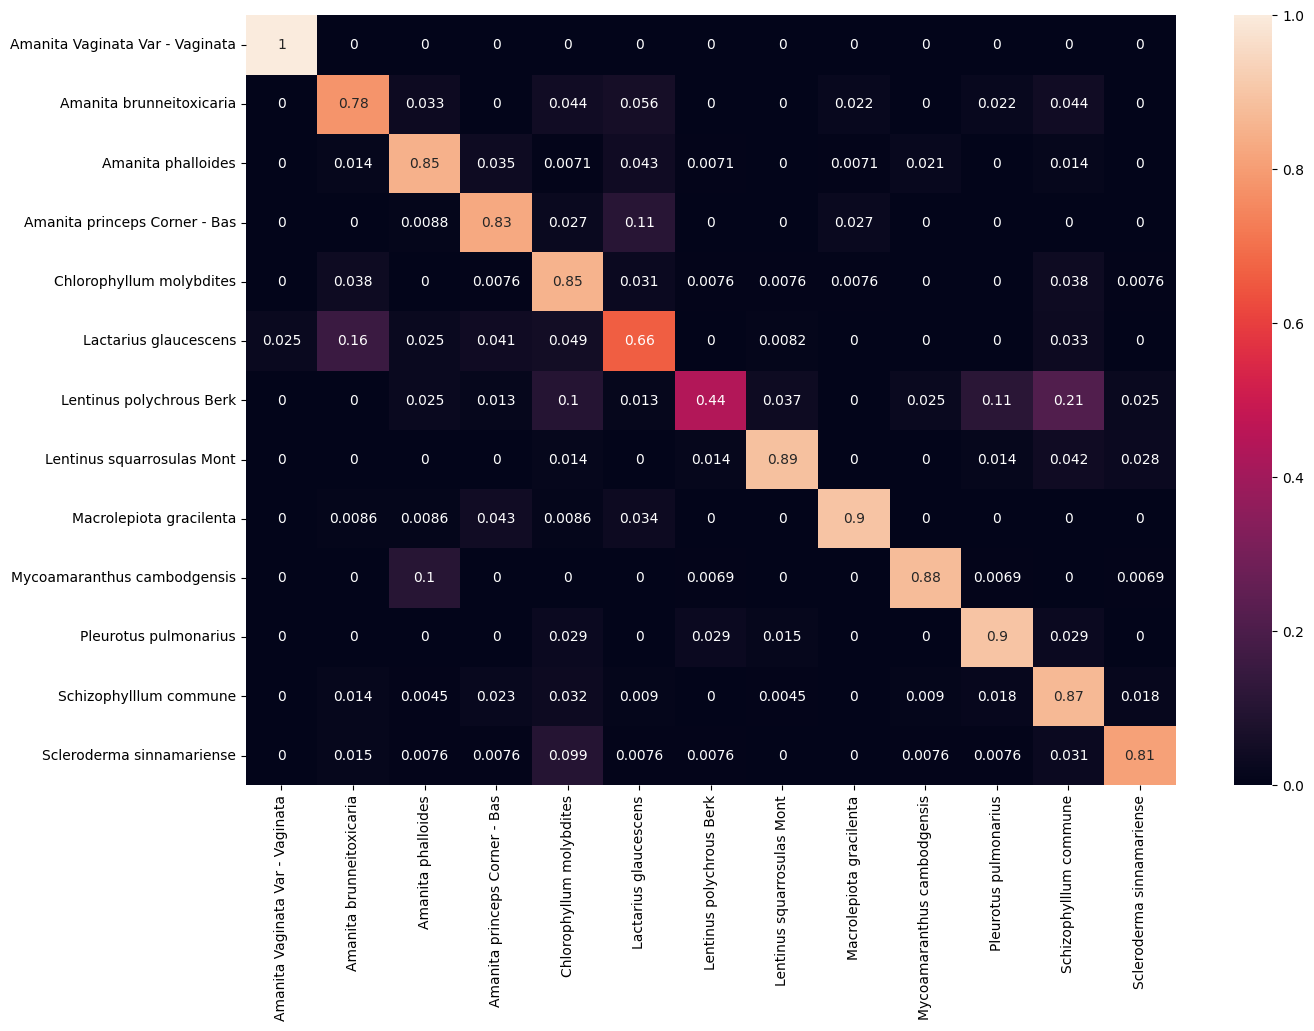

In [164]:
c_mat = confusion_matrix(indices_of_ones_2, prediction_2, normalize='true')
plt.figure(figsize=(15,10))
sns.heatmap(c_mat, annot=True, xticklabels=mushroom_names, yticklabels=mushroom_names)

### Aunque con posible overfitting en el caso de la Amanita Vaginata Var, dado que se ha multiplicado por 4 sus entradas en el dataframe de entrenamiento, se ha conseguido evitar las confusiones entre columnas, siendo en todos los casos la dominante el cruce consigo misma.

In [165]:
import pickle

In [166]:
with open('..\\models\\cnn_model.pkl', "wb") as archivo_salida:
    pickle.dump(cnn_model_final, archivo_salida)

In [171]:
import yaml

In [172]:
model_config = cnn_model_final.to_json()

In [173]:
model_config_dict = yaml.safe_load(model_config)


with open('..\\models\\cnn_model_config.yaml', 'w') as yaml_file:
    yaml.dump(model_config_dict, yaml_file, default_flow_style=False)

### Preparación del dataset de Test, hasta ahora nunca visto por el modelo.

In [175]:
final_test = pd.read_csv('..\\data\\images\\00_images_test.csv')

In [176]:
final_test

,filename,Amanita Vaginata Var - Vaginata,Amanita brunneitoxicaria,Amanita phalloides-,Amanita princeps Corner - Bas,Chlorophyllum molybdites,Lactarius glaucescens,Lentinus polychrous Berk,Lentinus squarrosulas Mont,Macrolepiota gracilenta,Mycoamaranthus cambodgensis,Pleurotus pulmonarius,Schizophylllum commune,Scleroderma sinnamariense
0,IMG_20230205_213826_Burst15_jpg.rf.00f812e32a7...,0,1,0,0,0,0,0,0,0,0,0,0,0
1,09-2-1024x1024_jpg.rf.04037a632612671b854cee03...,0,0,0,0,0,0,0,0,0,0,0,1,0
2,IMG_20230201_133654_Burst09_jpg.rf.08d59b26b46...,0,0,0,0,0,0,0,0,1,0,0,0,0
3,IMG_20230206_103039_Burst09_jpg.rf.0b3b254d419...,0,0,1,0,0,0,0,0,0,0,0,0,0
4,IMG_20230201_140955_Burst13_jpg.rf.0930e841d5d...,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,IMG_20230205_210801_Burst17_jpg.rf.ff3e4d75e28...,0,1,0,0,0,0,0,0,0,0,0,0,0
481,1XUnP1631875059_jpg.rf.fe96ac0de7a0d9a1d851be8...,0,0,0,0,0,0,1,0,0,0,0,0,0
482,IMG_20230205_211008_Burst09_jpg.rf.feb462381ab...,0,1,0,0,0,0,0,0,0,0,0,0,0
483,09-2-1024x1024_jpg.rf.fff32c2617ee73ccf59ac3f8...,0,0,0,0,0,0,0,0,0,0,0,1,0


In [178]:
def read_images_test(image_path):
    img = cv2.imread(image_path)
    return img

# Apply the read_image function to the 'image_name' column
final_test['pixel_array'] = final_test['filename'].apply(lambda x: read_images_test('..\\data\\images\\new_test\\'+x))

In [179]:
final_test.head()

,filename,Amanita Vaginata Var - Vaginata,Amanita brunneitoxicaria,Amanita phalloides-,Amanita princeps Corner - Bas,Chlorophyllum molybdites,Lactarius glaucescens,Lentinus polychrous Berk,Lentinus squarrosulas Mont,Macrolepiota gracilenta,Mycoamaranthus cambodgensis,Pleurotus pulmonarius,Schizophylllum commune,Scleroderma sinnamariense,pixel_array
0,IMG_20230205_213826_Burst15_jpg.rf.00f812e32a7...,0,1,0,0,0,0,0,0,0,0,0,0,0,"[[[124, 130, 129], [77, 83, 82], [85, 91, 90],..."
1,09-2-1024x1024_jpg.rf.04037a632612671b854cee03...,0,0,0,0,0,0,0,0,0,0,0,1,0,"[[[206, 203, 198], [214, 211, 206], [217, 215,..."
2,IMG_20230201_133654_Burst09_jpg.rf.08d59b26b46...,0,0,0,0,0,0,0,0,1,0,0,0,0,"[[[84, 105, 113], [73, 92, 100], [65, 82, 91],..."
3,IMG_20230206_103039_Burst09_jpg.rf.0b3b254d419...,0,0,1,0,0,0,0,0,0,0,0,0,0,"[[[67, 72, 70], [70, 73, 71], [58, 57, 59], [6..."
4,IMG_20230201_140955_Burst13_jpg.rf.0930e841d5d...,0,0,0,1,0,0,0,0,0,0,0,0,0,"[[[47, 80, 73], [113, 149, 143], [141, 181, 18..."


In [180]:
X_final_test = np.array(final_test['pixel_array'].tolist())

In [181]:
prediction_final_test = cnn_model_final.predict(X_final_test).argmax(axis=1)

16/16 [==============================] - 1s 23ms/step


In [182]:
y_final_test=np.array(final_test.drop(columns=['filename', 'pixel_array']))

In [188]:
indices_of_ones_final_test = np.argmax(y_final_test, axis=1)

<Axes: >

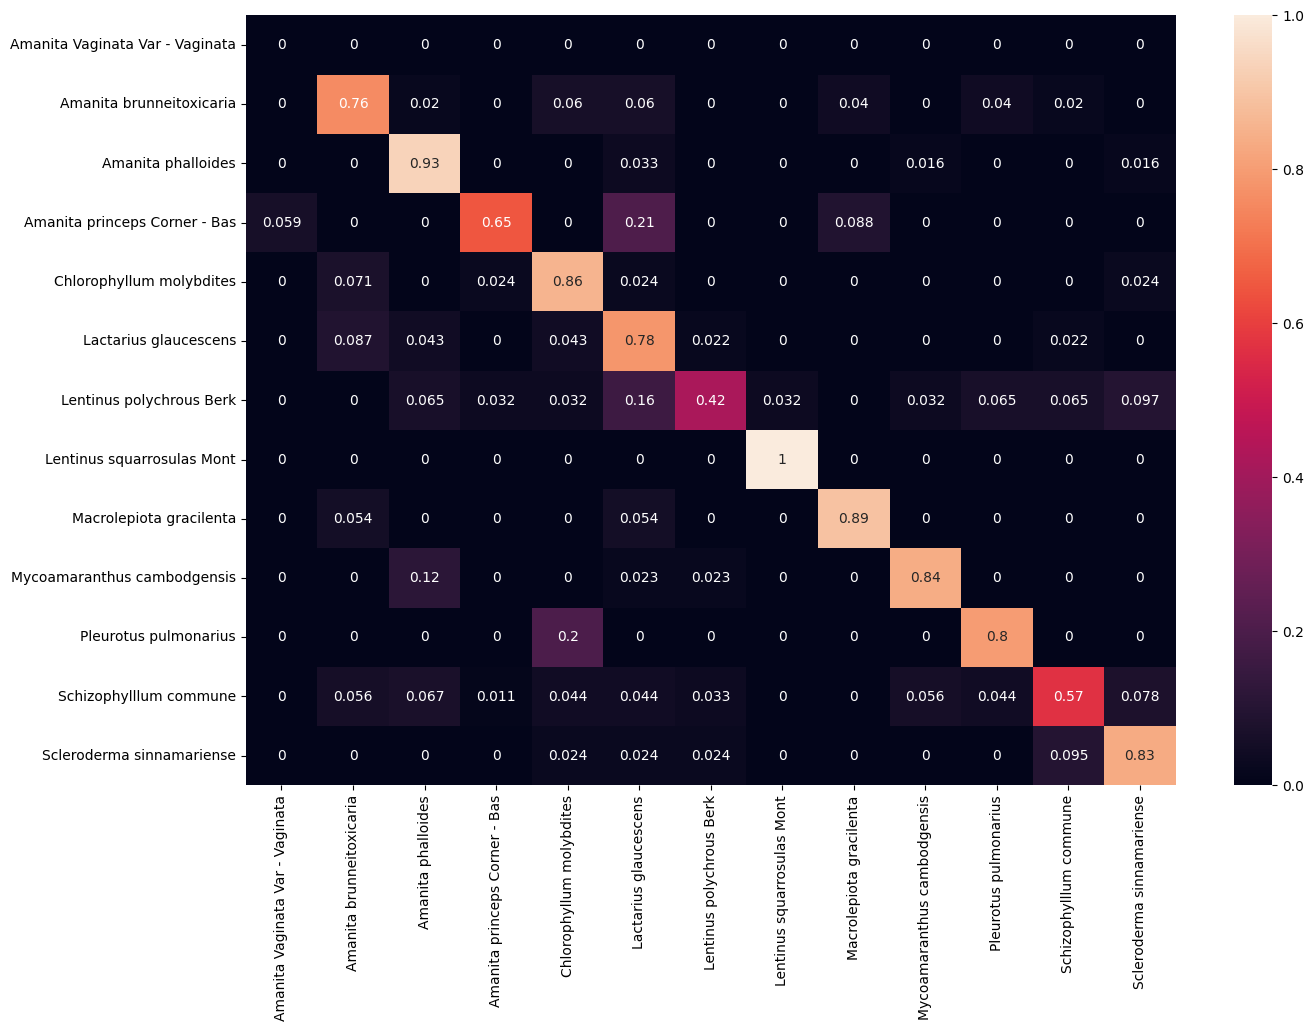

In [189]:
c_mat = confusion_matrix(indices_of_ones_final_test, prediction_final_test, normalize='true')
plt.figure(figsize=(15,10))
sns.heatmap(c_mat, annot=True, xticklabels=mushroom_names, yticklabels=mushroom_names)

In [190]:
results_final_test = cnn_model_final.evaluate(X_final_test, y_final_test)
results_final_test

16/16 [==============================] - 0s 22ms/step - loss: 0.8470 - accuracy: 0.7505


[0.8469865918159485, 0.7505154609680176]

Aunque el modelo no tiene una predicción perfecta, ***en todos los casos*** (salvo en la primera columna, en la que el test directamente no incluye ningún ejemplo) ***el acierto es la probabilidad más alta***, y conserva una **accuracy de 0.75** sobre ***0.84*** del entrenamiento.